<a href="https://colab.research.google.com/github/ahberson/Berson_QNC_Fall2025/blob/main/Berson_QNC_Presentation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The below code/figures were utilized in my QNC Presentation #1 on 11/07/25 (Aaron Berson)

# Generate Example Power Spectra from 1-15Hz
Using synthetic data, I show below an example power spectrum (1-15hz) plot with a clear peak at 5hz.

## Generate a synthetic signal
I created an example time domain trace by combining sine waves to emphasize how most neural signals have strong components at several frequencies. To show a prominent 5Hz component in the frequency domain, I made the amplitude of the 5Hz sine wave much larger than the rest.


In [2]:
import numpy as np

# Time array representing 10 seconds of data with a sampling rate of 1000Hz
sampling_rate = 1000
duration = 10
t = np.linspace(0, duration, duration * sampling_rate, endpoint=False)

# Sine wave with a frequency of 5 Hz and an amplitude of 1
frequency_5hz = 5
amplitude_5hz = 2
sine_5hz = amplitude_5hz * np.sin(2 * np.pi * frequency_5hz * t)

# Sine wave with a frequency of 2 Hz and a smaller amplitude (e.g., 0.2)
frequency_2hz = 2
amplitude_2hz = 0.1
sine_2hz = amplitude_2hz * np.sin(2 * np.pi * frequency_2hz * t)

# Sine wave with a frequency of 10 Hz and a smaller amplitude (e.g., 0.1)
frequency_10hz = 10
amplitude_10hz = 0.1
sine_10hz = amplitude_10hz * np.sin(2 * np.pi * frequency_10hz * t)

# Random noise
random_noise = np.random.randn(len(t)) * 0.2

# Sum the sine waves and noise to create the synthetic time domain signal
synthetic_signal = sine_5hz + sine_2hz + random_noise

print(synthetic_signal)

[-0.03172614 -0.49414521  0.00493255 ... -0.32911606 -0.26712462
  0.23144883]


## Compute Power Spectrum
Converted time domain signal to frequency domain by using the fast fourier transform (FFT).


In [3]:
from scipy.fft import fft, fftfreq

# Compute the Fast Fourier Transform (FFT) of the synthetic_signal
fft_result = fft(synthetic_signal)

# FFT frequencies
frequencies = fftfreq(len(synthetic_signal), 1/sampling_rate)

# Compute the power spectrum
power_spectrum = np.abs(fft_result)**2 / len(synthetic_signal)

# Convert power to dB
power_spectrum_db = 10 * np.log10(power_spectrum)

# Filter the frequencies and power spectrum to include only the range of interest (1Hz to 15Hz)
frequency_mask = (frequencies >= 1) & (frequencies <= 15)
filtered_frequencies = frequencies[frequency_mask]
filtered_power_spectrum_db = power_spectrum_db[frequency_mask]

print(filtered_frequencies)
print(filtered_power_spectrum_db)

[ 1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3
  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7
  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1
  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5
  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9
  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3
  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7
 10.8 10.9 11.  11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1
 12.2 12.3 12.4 12.5 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5
 13.6 13.7 13.8 13.9 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9
 15. ]
[ -9.9497001  -23.77134457 -19.05850827 -13.85794162 -14.60203241
 -14.19739219 -22.36794178 -15.17448206 -14.123155   -21.93685661
  14.14488583 -23.62584904 -19.88641628  -9.34993182 -13.62489173
 -10.14912554 -18.82795892 -15.31136666 -15.59022513 -27.03072395
 -12.98241438 -23.2

## Plot the Power Spectrum


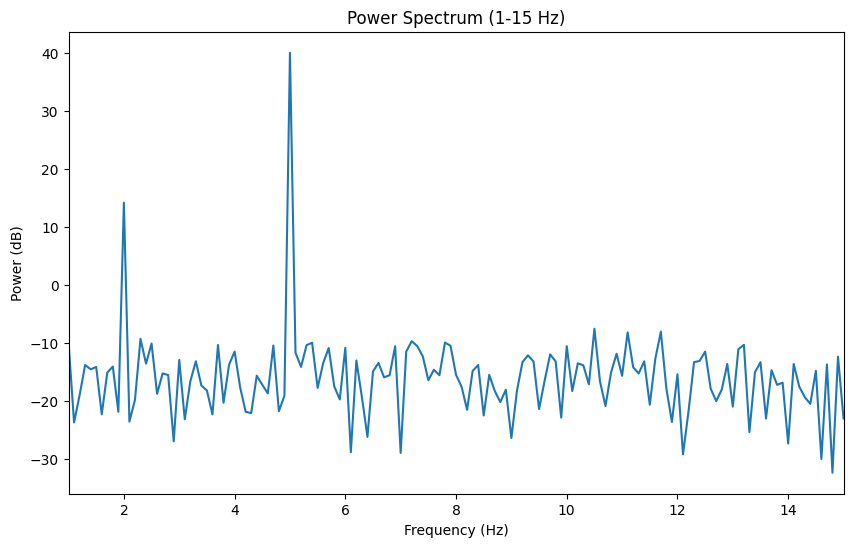

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(filtered_frequencies, filtered_power_spectrum_db)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.title('Power Spectrum (1-15 Hz)')
plt.xlim(1, 15)
plt.show()

# Make Example Histogram to Show Signal-to-Noise Ratio (SNR) Cutoff for Considering Tremor Peaks
I only want to consider windows where the tremor frequency (4-12Hz) peak is "prominent." To ensure this, I will plot the signal-to-noise ratio (SNR) of each window's peak compared to the average power of surrounding freqeuncy bands (e.g., 1-3Hz and 13-15Hz). SNR willbe calculated as such:

```
SNR (dB) = 10 * log ( Peak Power / ((1-3Hz Power + 13-15Hz Power)/2) )
```


These SNRs will be plotted on a histogram and only windows with peaks that have SNR > 0 will be considered in later analysis.

Here, I simulate the SNR histogram with values between -10 to 10. I have arbitrarily set 80% of the values to be above 0 and 60% of the values to lay between 1 and 5.

In [7]:
array_size = 100

# Number of values in each range
num_above_zero = int(0.8 * array_size)
num_between_1_and_5 = int(0.6 * array_size)
num_below_or_equal_zero = int(0.2 * array_size)
num_between_0_and_1 = (num_above_zero - num_between_1_and_5) // 2
num_above_5 = (num_above_zero - num_between_1_and_5) - num_between_0_and_1

# Generate random values within each range
array_between_1_and_5 = np.random.uniform(1, 5, num_between_1_and_5)
array_below_or_equal_zero = np.random.uniform(-10, 0, num_below_or_equal_zero)
array_between_0_and_1 = np.random.uniform(0.001, 1, num_between_0_and_1)
array_above_5 = np.random.uniform(5, 10, num_above_5)

# Fix: Use np.random.permutation to get a shuffled copy, as np.random.shuffle shuffles in-place and returns None.
combined_array = np.random.permutation(np.concatenate((array_below_or_equal_zero, array_between_1_and_5, array_between_0_and_1, array_above_5)))

print(f"Total array size: {len(combined_array)}")
print(f"Number of values <= 0: {np.sum(combined_array <= 0)}")
print(f"Number of values > 0: {np.sum(combined_array > 0)}")
print(f"Number of values between 1 and 5: {np.sum((combined_array >= 1) & (combined_array <= 5))}")

Total array size: 100
Number of values <= 0: 20
Number of values > 0: 80
Number of values between 1 and 5: 60


## Plot histogram


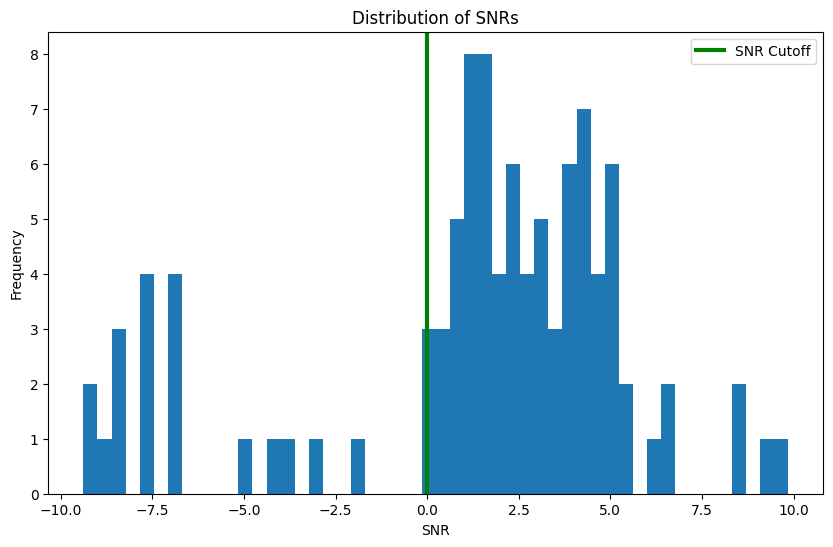

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(combined_array, bins=50)
plt.xlabel('SNR')
plt.ylabel('Frequency')
plt.title('Distribution of SNRs')

# Add a thick green vertical line at x=0
plt.axvline(0, color='green', linestyle='-', linewidth=3, label='SNR Cutoff')

plt.legend()
plt.show()

# Show Example Histogram of Peak Tremor Frequencies (Post-Cutoff)

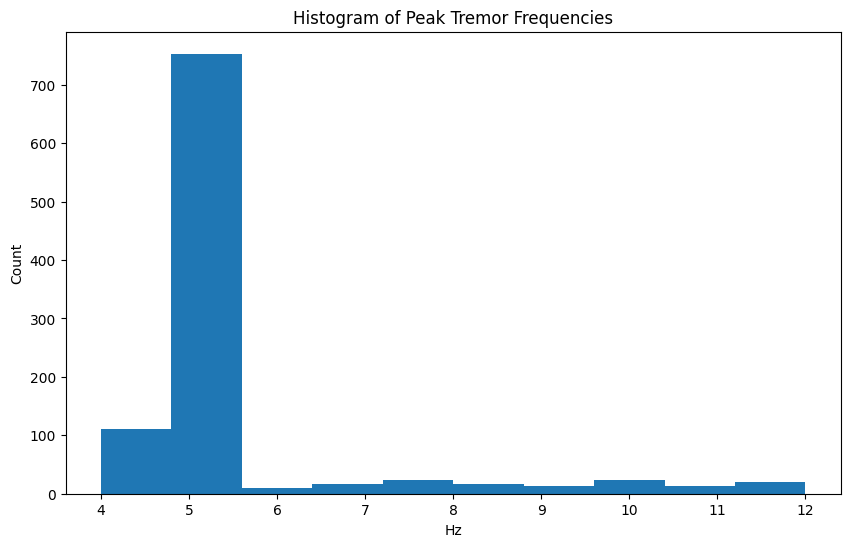

In [11]:
total_data_points = 1000
percent_at_five = 0.7
num_at_five = int(total_data_points * percent_at_five)
data_at_five = np.full(num_at_five, 5.0)
num_other_values = total_data_points - num_at_five

num_low = num_other_values // 2  # Values between 4 and 5 (exclusive of 5)
num_high = num_other_values - num_low # Values between 5 and 12 (exclusive of 5)

# For values just below 5
other_low_values = np.random.uniform(4.0, 4.999, num_low)
# For values just above 5
other_high_values = np.random.uniform(5.001, 12.0, num_high)

# Combine all generated data
combined_data = np.random.permutation(np.concatenate((data_at_five, other_low_values, other_high_values)))

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(combined_data, bins=10, range=(4, 12))
plt.xlabel('Hz')
plt.ylabel('Count')
plt.title('Histogram of Peak Tremor Frequencies')
plt.show()

# Example Paired, Non-Parametric Permutation Test for Granger Causality Results

## Generate paired data
I am making two datasets with similar standard deviations but one has a higher mean.

In [14]:
# Data for group 1 (mean=10, std=2)
data_group1 = np.random.normal(loc=10, scale=2, size=50)

# Data for group 2 (mean=12, std=2)
data_group2 = np.random.normal(loc=12, scale=2, size=50)

print(f"Mean of group 1: {np.mean(data_group1)}")
print(f"Mean of group 2: {np.mean(data_group2)}")

Mean of group 1: 10.339930393315981
Mean of group 2: 11.908453883712514


## Perform Permutation Test
Calculate the differences, set the number of permutations, and perform the permutation test to generate the null distribution of test statistics.


In [15]:
# Calculate the difference between the paired data points
differences = data_group2 - data_group1

# Set 5000 permutations to perform
n_permutations = 5000

permutation_test_statistics = []
for _ in range(n_permutations):

  # Generate an array of random signs (+1 or -1) with the same length as the difference array
  random_signs = np.random.choice([-1, 1], size=len(differences))

  # Multiply the difference array by the random signs to create a permuted difference array
  permuted_differences = differences * random_signs

  # Calculate mean of the permuted difference array
  permuted_mean_difference = np.mean(permuted_differences)

  # Append mean to permutation_test_statistics
  permutation_test_statistics.append(permuted_mean_difference)

print(permutation_test_statistics[:10])

[np.float64(-0.35027181595851997), np.float64(-0.5495285890655337), np.float64(0.9065219698597242), np.float64(-0.39163530109645917), np.float64(0.48214450714193563), np.float64(-0.5466037663995086), np.float64(0.8185427314526563), np.float64(0.26978858323980187), np.float64(-0.15257208532842814), np.float64(0.07678229895127327)]


## Calculate Test Statistic
I'll use mean of the differences here.


In [16]:
# Calculate the mean of the differences array (observed test statistic)
observed_test_statistic = np.mean(differences)
print(observed_test_statistic)

1.5685234903965322


## Generate permutation distribution

### Subtask:
Create a distribution of the test statistics calculated from the permuted data.


**Reasoning**:
Convert the permutation test statistics list to a NumPy array and display the first few elements.



Calculated p-value: 0.0002


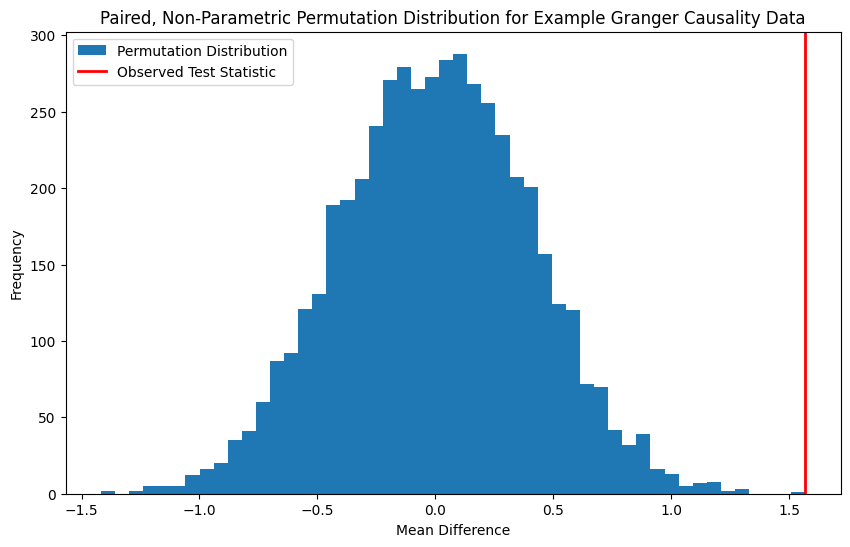

In [17]:
permutation_test_statistics_array = np.array(permutation_test_statistics)

# Calculate the p-value (two-tailed)
p_value = np.sum(np.abs(permutation_test_statistics_array) >= np.abs(observed_test_statistic)) / n_permutations
print(f"Calculated p-value: {p_value}")

# Plot results on histogram
plt.figure(figsize=(10, 6))
plt.hist(permutation_test_statistics_array, bins=50, label='Permutation Distribution')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.title('Paired, Non-Parametric Permutation Distribution for Example Granger Causality Data')

# Vertical line for observed_test_statistic
plt.axvline(observed_test_statistic, color='red', linestyle='-', linewidth=2, label='Observed Test Statistic') #mean difference

plt.legend()
plt.show()